# The honesty of the Fandango's movie rating system

In October 2015, a data journalist named **Walt Hickey** analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). 
He founded that Fandango almost always rounds up movies ratings to the nearest half-star. For example, 4.1 rounds to 4.5. The research itself can be found [here](https://fivethirtyeight.com/features/fandango-movies-ratings/)

In this guided project we are going to reanalize this on more recent movie ratings data to determine whether they have changed their rounding strategy after Hickey's analysis.

# Investigating the data sets

We are provided by two data sets: one, that was collected by Walt Hickey for his research and the other that holds information about different movie ratings for movies released in 2016 and 2017. We are going to examine these data sets to be sure the information is relevant for our purposes.


In [1]:
import pandas as pd
ratings_15 = pd.read_csv('fandango_score_comparison.csv')
ratings_15.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


The explanation of the columns can be found [here](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md)

As we are not interested in rating systems other than fandango's, we'll extract only relevant columns from the initial data set.

In [2]:
columns = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
fand_15 = ratings_15[columns].copy()
print(fand_15.info())
print(fand_15.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILM                  146 non-null    object 
 1   Fandango_Stars        146 non-null    float64
 2   Fandango_Ratingvalue  146 non-null    float64
 3   Fandango_votes        146 non-null    int64  
 4   Fandango_Difference   146 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB
None
                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fa

As we can see in the original article, the data set is a sample from all movies offered by Fandango service. The criterias of choosing were:
1. The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015)

2. The movie must have had tickets on sale in 2015

Although the sample is quite unlikely represents all the population, it can be relevant for our purpose if our second sample with the data from 2016 and 2017 was collected by the same criterias

Let's examine the second data set

In [3]:
ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')
print(ratings_16_17.head())

                     movie  year  metascore  imdb  tmeter  audience  fandango  \
0      10 Cloverfield Lane  2016         76   7.2      90        79       3.5   
1                 13 Hours  2016         48   7.3      50        83       4.5   
2      A Cure for Wellness  2016         47   6.6      40        47       3.0   
3          A Dog's Purpose  2017         43   5.2      33        76       4.5   
4  A Hologram for the King  2016         58   6.1      70        57       3.0   

   n_metascore  n_imdb  n_tmeter  n_audience  nr_metascore  nr_imdb  \
0         3.80    3.60      4.50        3.95           4.0      3.5   
1         2.40    3.65      2.50        4.15           2.5      3.5   
2         2.35    3.30      2.00        2.35           2.5      3.5   
3         2.15    2.60      1.65        3.80           2.0      2.5   
4         2.90    3.05      3.50        2.85           3.0      3.0   

   nr_tmeter  nr_audience  
0        4.5          4.0  
1        2.5          4.0  
2 

The legend is provided [here](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md)

We can see there are also many kinds of ratings. We're going to extract only information related to Fandango.

In [4]:
columns = ['movie', 'year', 'fandango']
fand_16_17 = ratings_16_17[columns].copy()
print(fand_16_17.head(5))
print(fand_16_17.info())

                     movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie     214 non-null    object 
 1   year      214 non-null    int64  
 2   fandango  214 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB
None


As we can see from the README file mentioned above, the data set contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017.

So we see that criterias of making samples were different for 2 given data sets. Nevertheless we could make some conclusions about fandango's rounding strategy had we information about the actual rating in the second data set. But we have only already rounded ratings

Now we have two options:
1. Try to collect new data
2. Change the goal of the research

# Changing the goal
We will slightly change our goal and try to find some changes in relative differences between fandango's ratings and the others' through the years.

We are also going to follow the given goal - to find any difference between Fandango's ratings for popular movies in 2015 and 2016. Let's start with the latter.

# Fandango's ratings for popular movies. 2015 vs. 2016
The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

We need to inspect both data sets to extract only the movies with at least 30 ratings.



In [5]:
#minimum number of ratings in the data set from 2015
fand_15['Fandango_votes'].describe()['min']

35.0

Every movie from the first data sets matches our criteria of popularity.

But we face with another flaw - we don't have information about number of ratings in the second data set. As all our project becomes more and more blur let's assume that all movies have at least 30 ratings. It is reasonable as we have read in the README file: the data set contains movie ratings data for 214 of the **most popular movies**. It is very unlikely that there is any movie with less than 30 ratings considered as "Popular".

Now we'll focus only on the films released in 2015 and 2016. We should extract a year of a release from the 'FILM' column in our first data set

In [6]:
fand_15['year'] = fand_15['FILM'].str[-5:-1].astype('int')
fand_15['FILM'] = fand_15['FILM'].str[:-7]

In [7]:
fand_15.year.value_counts()

2015    129
2014     17
Name: year, dtype: int64

Now we'll take movies only from 2015

In [8]:
f_15 = fand_15[fand_15.year == 2015].copy()
f_15.shape

(129, 6)

From the second data set we'll take movies from 2016

In [9]:
fand_16_17['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [10]:
f_16 = fand_16_17[fand_16_17['year'] == 2016].copy()
f_16.shape

(191, 3)

Now, we will clear both data sets for the further concatenating

In [11]:
f_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 145
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILM                  129 non-null    object 
 1   Fandango_Stars        129 non-null    float64
 2   Fandango_Ratingvalue  129 non-null    float64
 3   Fandango_votes        129 non-null    int64  
 4   Fandango_Difference   129 non-null    float64
 5   year                  129 non-null    int32  
dtypes: float64(3), int32(1), int64(1), object(1)
memory usage: 6.6+ KB


We don't need columns in the first data set that we don't have in the second one

In [12]:
f_15.drop(['Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'], axis=1, inplace = True)

In [13]:
f_15.sample(3)

,FILM,Fandango_Stars,year
103,Strange Magic,3.5,2015
2,Ant-Man,5.0,2015
137,Danny Collins,4.0,2015


In [14]:
f_15.rename(columns = {'FILM': 'movie', 
                       'Fandango_Stars': 'fandango'}, inplace=True)
f_15 = f_15[['movie', 'year', 'fandango']]
f_15.sample(3)

,movie,year,fandango
32,The Hunting Ground,2015,4.5
60,Unfinished Business,2015,3.5
94,The Overnight,2015,3.5


In [15]:
f_16.sample(3)

,movie,year,fandango
4,A Hologram for the King,2016,3.0
132,Pete's Dragon,2016,4.5
16,Bad Santa 2,2016,3.5


Now we can concatenate tables

In [16]:
fandango = pd.concat([f_15, f_16], 
                     axis = 0, 
                     ignore_index = True)

In [17]:
print(fandango.sample(5))
fandango.info()

                      movie  year  fandango
301       The Perfect Match  2016       4.0
279              The Choice  2016       4.0
4    Hot Tub Time Machine 2  2015       3.5
171           Elvis & Nixon  2016       3.5
67                  Chappie  2015       4.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie     320 non-null    object 
 1   year      320 non-null    int64  
 2   fandango  320 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.6+ KB


Everything seems right and we can visualize our results. We'll use kernel dencity plots

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

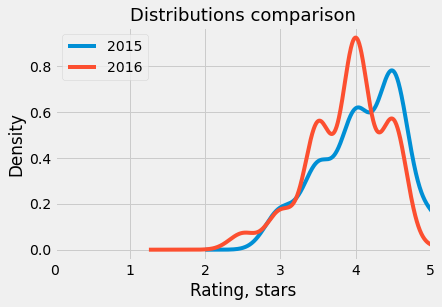

In [19]:
fandango[fandango['year'] == 2015]['fandango'].plot.kde(label='2015', legend=True)
fandango[fandango['year'] == 2016]['fandango'].plot.kde(label='2016', legend=True)

plt.title('Distributions comparison', size=18)
plt.xlabel('Rating, stars')
plt.xlim(0,5)
plt.show()

It is clear from the graph above that distribution of ratings becomes less high, which could mean that rating system has been changed and become more fair. But this conclusion could be made only had we representative samples. But we had not. So we just had a little practice with manipulating and vizualising data, which is also beneficial.
> **We can't make any relevant conclusion from this chart**

# Comparing related ratings
Initialy we wanted to analize whether fandango continue their unfair rounding policy after Hickey's article was published or not. For movies released in 2015 we have actual ratings scraped from html and rounded ratings presented on the site, so we can check the method of rounding used. But for the movies from 2016 and 2017 we have only ratings which were already rounded and it makes impossible to inspect the rounding strategy.

Luckily we have ratings from other sites for all periods and we can track how they differ compared to fandango throughout 3 years.

We may assume that if fandango's ratings stays higher than other's, their rating principles have stayed the same.

We are going to analize the dynamics of ratings and see how fandango's relates to others.

Firstly we will exctract only useful information from both data sets, then we'll concatenate tables and visualize the results

In [20]:
columns_15 = ['FILM', 
              'Fandango_Stars', 
              'RT_norm_round',
              'RT_user_norm_round',
              'Metacritic_norm_round',
              'IMDB_norm_round'
             ]
db_15 = ratings_15[columns_15].copy()

columns_16 = ['movie',
              'year',
              'fandango',
              'nr_metascore',
              'nr_imdb',
              'nr_tmeter',
              'nr_audience' 
             ]
db_16 = ratings_16_17[columns_16].copy()

In [21]:
#Extracting year

db_15['year'] = db_15['FILM'].str[-5:-1].astype('int')
db_15['FILM'] = db_15['FILM'].str[:-7]

In [22]:
#Renaming columns

db_15.rename(columns = {'FILM': 'movie',
                        'Fandango_Stars': 'fan',
                        'RT_norm_round': 'rt_critics',
                        'RT_user_norm_round': 'rt_user',
                        'Metacritic_norm_round': 'meta',
                        'IMDB_norm_round': 'imdb'
                       }, inplace=True)
db_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       146 non-null    object 
 1   fan         146 non-null    float64
 2   rt_critics  146 non-null    float64
 3   rt_user     146 non-null    float64
 4   meta        146 non-null    float64
 5   imdb        146 non-null    float64
 6   year        146 non-null    int32  
dtypes: float64(5), int32(1), object(1)
memory usage: 7.5+ KB


In [23]:
#Sorting columns

db_15 = db_15.loc[:,['movie',
                   'year',
                   'meta',
                   'rt_critics',
                   'rt_user',
                   'imdb',
                   'fan']]
db_15.sample(3)

,movie,year,meta,rt_critics,rt_user,imdb,fan
109,The 100-Year-Old Man Who Climbed Out the Windo...,2015,3.0,3.5,3.5,3.5,4.0
130,Jurassic World,2015,3.0,3.5,4.0,3.5,4.5
26,Ex Machina,2015,4.0,4.5,4.5,4.0,4.5


Now our first data set is ready, let's clear the second

In [24]:
db_16.head(4)

,movie,year,fandango,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,3.5,4.0,3.5,4.5,4.0
1,13 Hours,2016,4.5,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,3.0,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,4.5,2.0,2.5,1.5,4.0


In [25]:
#Renaming columns

db_16.rename(columns = {'fandango': 'fan',
                        'nr_tmeter': 'rt_critics',
                        'nr_audience': 'rt_user',
                        'nr_metascore': 'meta',
                        'nr_imdb': 'imdb'
                       }, inplace=True)
db_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       214 non-null    object 
 1   year        214 non-null    int64  
 2   fan         214 non-null    float64
 3   meta        214 non-null    float64
 4   imdb        214 non-null    float64
 5   rt_critics  214 non-null    float64
 6   rt_user     214 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 11.8+ KB


In [26]:
db_16 = db_16.loc[:,['movie',
                     'year',
                     'meta',
                     'rt_critics',
                     'rt_user',
                     'imdb',
                     'fan']]
db_16.sample(3)

,movie,year,meta,rt_critics,rt_user,imdb,fan
187,The Magnificent Seven,2016,2.5,3.0,3.5,3.5,4.5
113,Miss Peregrine's Home for Peculiar Children,2016,3.0,3.0,3.0,3.5,4.0
164,The Boy,2016,2.0,1.5,2.0,3.0,3.5


Now both data sets are ready to be joined

In [27]:
db_all = pd.concat([db_15, db_16], 
                     axis = 0, 
                     ignore_index = True)

In [28]:
db_all.sample(5)

,movie,year,meta,rt_critics,rt_user,imdb,fan
269,Nocturnal Animals,2016,3.5,3.5,3.5,4.0,3.5
15,Taken 3,2015,1.5,0.5,2.5,3.0,4.5
323,The Girl on the Train,2016,2.5,2.0,2.5,3.0,4.0
43,The Diary of a Teenage Girl,2015,4.5,5.0,4.0,3.5,4.0
247,Loving,2016,4.0,4.5,4.0,3.5,4.0


We will build 3 kernel dencity plots, each for every year and show distributions of ratings for every site

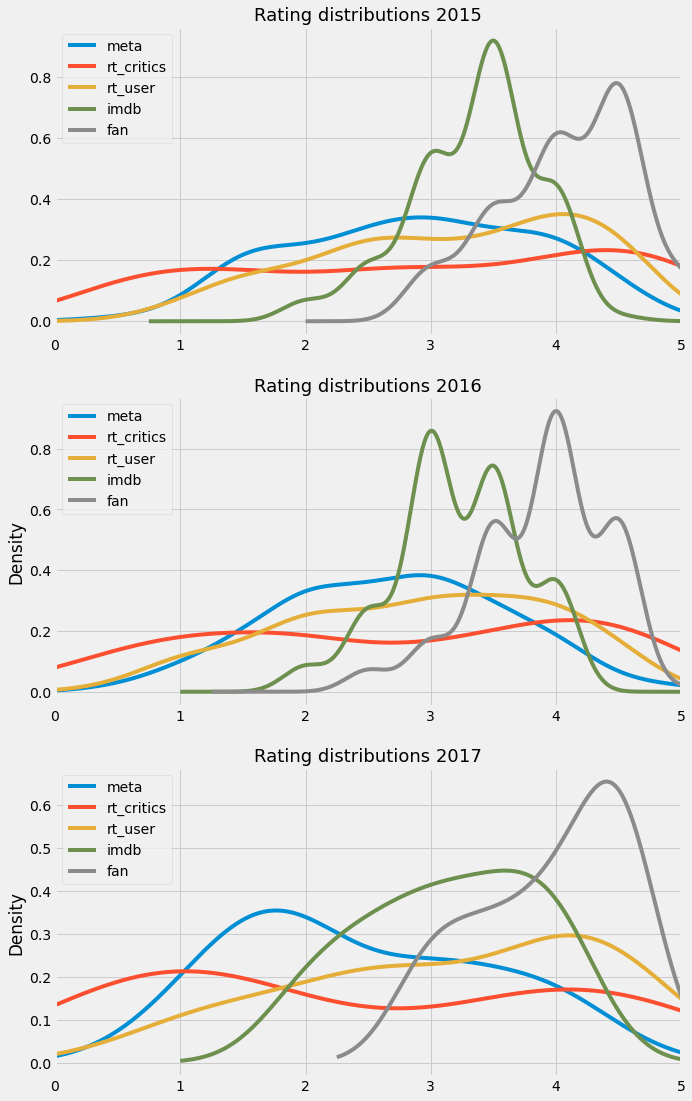

In [29]:
plt.figure(figsize = (10,18))
plt.subplot(3,1,1)

db_all[db_all['year'] == 2015]['meta'].plot.kde(label='meta', legend=True)
db_all[db_all['year'] == 2015]['rt_critics'].plot.kde(label='rt_critics', legend=True)
db_all[db_all['year'] == 2015]['rt_user'].plot.kde(label='rt_user', legend=True)
db_all[db_all['year'] == 2015]['imdb'].plot.kde(label='imdb', legend=True)
db_all[db_all['year'] == 2015]['fan'].plot.kde(label='fan', legend=True)

plt.title('Rating distributions 2015', size=18)
plt.ylabel('')

plt.xlim(0,5)

plt.subplot(3,1,2)

db_all[db_all['year'] == 2016]['meta'].plot.kde(label='meta', legend=True)
db_all[db_all['year'] == 2016]['rt_critics'].plot.kde(label='rt_critics', legend=True)
db_all[db_all['year'] == 2016]['rt_user'].plot.kde(label='rt_user', legend=True)
db_all[db_all['year'] == 2016]['imdb'].plot.kde(label='imdb', legend=True)
db_all[db_all['year'] == 2016]['fan'].plot.kde(label='fan', legend=True)

plt.title('Rating distributions 2016', size=18)
plt.xlim(0,5)

plt.subplot(3,1,3)

db_all[db_all['year'] == 2017]['meta'].plot.kde(label='meta', legend=True)
db_all[db_all['year'] == 2017]['rt_critics'].plot.kde(label='rt_critics', legend=True)
db_all[db_all['year'] == 2017]['rt_user'].plot.kde(label='rt_user', legend=True)
db_all[db_all['year'] == 2017]['imdb'].plot.kde(label='imdb', legend=True)
db_all[db_all['year'] == 2017]['fan'].plot.kde(label='fan', legend=True)

plt.title('Rating distributions 2017', size=18)
plt.xlim(0,5)


plt.show()

As we can see from the charts above, fandango's ratings always quite higher and far more left skewed compared to others. We may say with some extent of confidence that fandango's ratings were stayed a bit unfair.

# Conclusion
It is very important to understand how relevant the data you are going to analize to your goals.
>**Always bear in mind the reality behind the data**